In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import seaborn as sns
sns.set(
    style='ticks',
    font_scale=1.5
)

In [3]:
import sys
sys.path.append('../src')
from beta_binomial import betabinom

# Beta-binomial distribution

In [72]:
N = 10000
a = N//2
p = np.random.beta(a, N-a, 1000000)
X = np.random.binomial(N, p)
Y = np.random.binomial(N, 0.5, size=1000000)
print(X.mean(), X.var())
print(Y.mean(), Y.var())

5000.042829 5006.65842468
5000.065233 2498.96213966


In [73]:
bb = betabinom(N, a, N - a)
bb.mean(), bb.var()

(5000.0, 4999.5000499950002)

(4000, 6000)

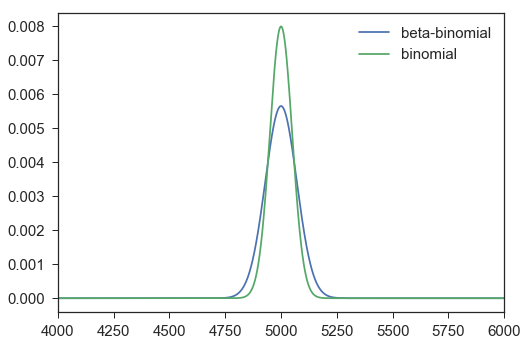

In [74]:
k = np.arange(N, dtype=int)
fig, ax = plt.subplots(1, 1, sharex=True, sharey=False)
ax.plot(bb.pmf(k), label='beta-binomial')
ax.plot(scipy.stats.binom(N, a/N).pmf(k), label='binomial')
ax.legend()
ax.set_xlim(4*N//10, 6*N//10)

In [75]:
def recurrence(p, s):
    p = p * (1 + s) / (1 + p * s)
    return p

In [136]:
N = 1000
n = 100
s = 0.1
x0 = 0.5

x, y, z = np.empty(n, dtype=float), np.empty(n, dtype=float), np.empty(n, dtype=float)
x[0], y[0], z[0] = x0, x0, x0

p1 = np.zeros((n, N), dtype=int)
p1[0, np.random.random(size=N) < x0] = 1
p2 = np.zeros((n, N), dtype=int)
p2[0, np.random.random(size=N) < x0] = 1


for t in range(1, n):
    x[t] = recurrence(x[t - 1], s)
    y[t] = recurrence(y[t - 1], s)
    z[t] = recurrence(z[t - 1], s) 
    
    if 0 < y[1] < 1:
        y[t] = scipy.stats.binom.rvs(N, y[t]) / N
    if 0 < z[t] < 1:
        z[t] = betabinom.rvs(N, N*z[t], N*(1 - z[t])) / N

    w = np.ones(N, dtype=float)
    w[p1[t - 1, :] == 1] = 1 + s
    w /= w.sum()
    p1[t, :] = np.random.choice(p1[t-1, :], size=N, replace=True, p=w)
    
    p2[t, :] = np.random.choice(p2[t-1, :], size=N, replace=True)
    w = np.ones(N, dtype=float)
    w[p2[t, :] == 1] = 1 + s
    w /= w.sum()
    p2[t, :] = np.random.choice(p2[t, :], size=N, replace=True, p=w)

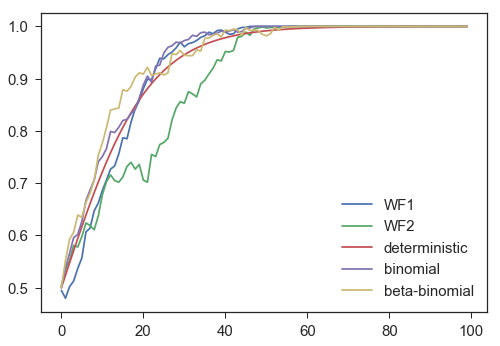

In [137]:
plt.plot(p1.mean(axis=1), label='WF1')
plt.plot(p2.mean(axis=1), label='WF2')

plt.plot(x, label='deterministic')
plt.plot(y, label='binomial')
plt.plot(z, label='beta-binomial')
plt.legend()

# plt.xlim(0, 500)